# Project Titanic - Machine Learning from disaster

- It isyour job to predict if a passenger survived the sinking of the Titanic or not 

For each in the test set, you must predict a (0, 1) (Not Survived, Survived) value for the variable.

- survival: 0 = NO, 1 = Yes
- pclass: ticket class(floor): 1 = 1st, 2 = 2st, 3 = 3st
- parch # of parents/ children aboard the Titanic
- sibsp: sibling like brother, sister... and spouse: wife, husband
- embared Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
file_train = "./data/train.csv"
file_test = "./data/test.csv"
train_df = pd.read_csv(file_train)
test_df = pd.read_csv(file_test)

In [54]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Review about data, columns

In [55]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Remove PassengerId - same row with index

## 2 method to Drop:
- drop : set_index, drop
- drop when we read file by index_col = "..."

### First method

In [57]:
train_df.set_index(train_df.PassengerId, inplace= True)

In [58]:
train_df.drop("PassengerId", axis= 1, inplace= True)
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Second method

In [59]:
## id PassengerId
test_df = pd.read_csv(file_test, index_col= 'PassengerId')

In [60]:
test_df.tail(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# 2. Feature classification: Categorical and Numerical
* this helps us select the appropriate plots for visualization

## Categorical
- Discrete - can not measure by number values
- Ex: gender, colors, country...
    - cate: nominal, ordinal, ratio, interval
        * Nominal: Thuộc tính rời rạc nominal là loại thuộc tính không có sự xếp hạng hay trật tự nào giữa các giá trị. Ví dụ như giới tính, quốc tịch, loại động vật, v.v.

        * Ordinal: Thuộc tính rời rạc ordinal là loại thuộc tính mà các giá trị có thứ tự nhất định, nhưng không có khoảng cách đo lường giữa các giá trị. Ví dụ như thứ hạng trong một cuộc thi, trình độ học vấn, mức độ hài lòng, v.v.

        * Interval: Thuộc tính rời rạc interval là loại thuộc tính mà khoảng cách giữa các giá trị là cố định và có ý nghĩa đo lường, nhưng không có giá trị tuyệt đối đại diện cho 0. Ví dụ như nhiệt độ theo độ Celsius, độ pH, v.v.

        * Ratio: Thuộc tính rời rạc ratio là loại thuộc tính mà khoảng cách giữa các giá trị là cố định và có ý nghĩa đo lường, và có giá trị tuyệt đối đại diện cho 0. Ví dụ như chiều cao, cân nặng, thời gian, v.v.

## Numerical
- Continuous - int, float..
- Ex: height, temperature, prices, times...
- age, fare

### Check missing, fill, isna...

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


### age, cabin, embarked  --> missing data...
### data types

In [63]:
print(train_df.dtypes)


Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


#### After observation
##### Take note

- categorical: survived, sex, embarked, pclass(ordinal), sibsp, parch
- numerical: age, fare
- mix (number, word): ticket, cabin
- contain error: name
- blank or null: cabin > age > embarked

### Continue: Conver int -> Categorical 

- Describe {cate, numerical} - it help you visual easily

##### Test feature 'Survived' first so write function to all other features.

In [64]:
train_df['Survived'] = train_df['Survived'].astype("category")

In [65]:
train_df['Survived'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


## 2.1 Write Function to cover feather to category


In [67]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]

#function to convert
def covert_Categorical(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")
        #df.Class is wrong b/c df."Pclass" => df["Pclass"]
        
covert_Categorical(train_df, features)
covert_Categorical(test_df, features)

In [69]:
print(train_df.info())
print("\n")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB
None


<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3  

### 2.2 Distribution

#### Numerical and Categorical

In [70]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [71]:
##Categorical
train_df.describe(include= ["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3. Exploratory data analysis

### 3.1 Correlating cate:
- cate: survived, sex, embarked, pclass, sibsp, parch

#### Target: -> Survived

#### 3.1.1 Survived

In [72]:
#Count how many people survived and not survived
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [73]:
## Base on percentages.
train_df["Survived"].value_counts(normalize= True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


#### 3.1.1 Sex

In [102]:
#Count how many male , female
print(train_df['Survived'].value_counts().to_frame())
print(train_df['Survived'].value_counts(normalize= True).to_frame())

          count
Survived       
0           549
1           342
          proportion
Survived            
0           0.616162
1           0.383838


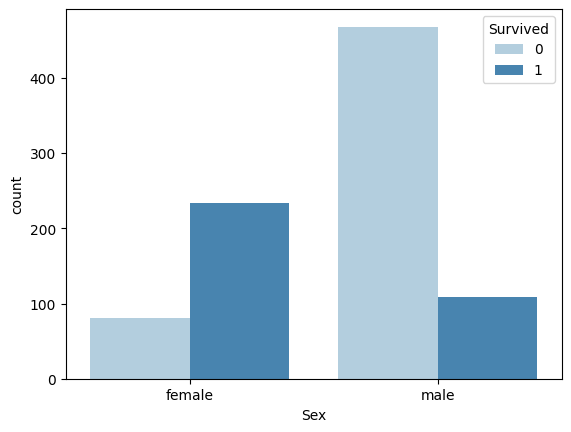

In [75]:
# percentage of survived of Male or Female
# display by seaborn
sns.countplot(data= train_df, x= "Sex", hue= "Survived", palette= "Blues");

#### Note:
- Survived: Female > Male

### 3.3.2 Display/ Visualization 5 columns by seaborn

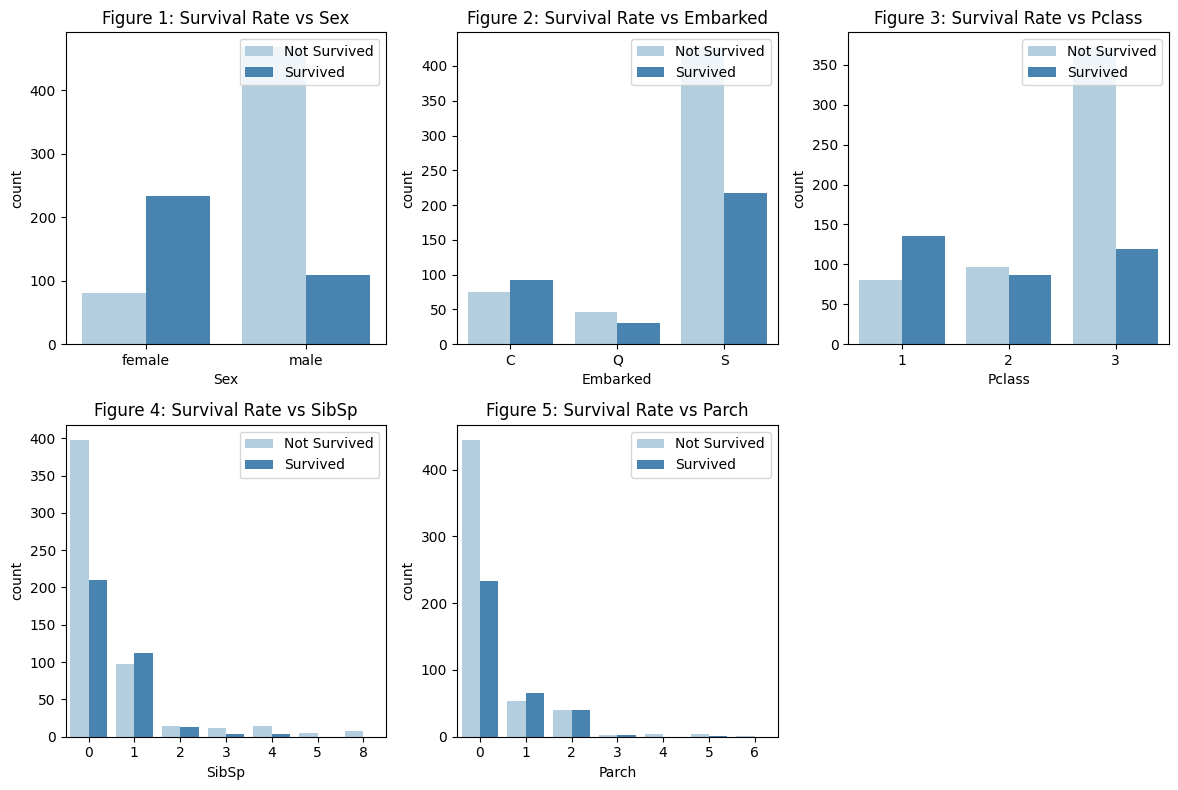

In [76]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
# set rows and columns
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize= (n_cols * 4, n_rows * 4))

## visualization
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c      ## index to loop through list 'cols'
        
        if(i < len(cols)):
            ax_i = ax[r, c]     ## create layout, a1, a2.....
            sns.countplot(train_df, ax= ax_i, x = cols[i], hue= "Survived", palette= "Blues")
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title= '', loc= 'upper right', labels= ['Not Survived', 'Survived'])
            
            
#Show
plt.tight_layout()  #word are not de len nhau
ax.flat[-1].set_visible(False)  # remove the last subplot
plt.show()
        

# After visualization/ Observation
#### 1. Survival Rate

- Fig1: Survived: Female > Male
- Fig2: most people from south.. and also had the hightest people not survived
- Fig3: 1st higher survival than other floors(2, 3), Not survived: most of floor 3
- Fi4: People not sibling are mostly not survived... 1,2 better
- Fig5: People with 0 parch are not sur

=== Combine fig4 and fig5 are quite same



## 3.2 EDA for numerical features
- Numerical: Age, Fare

### 3.2.1 Age


In [77]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

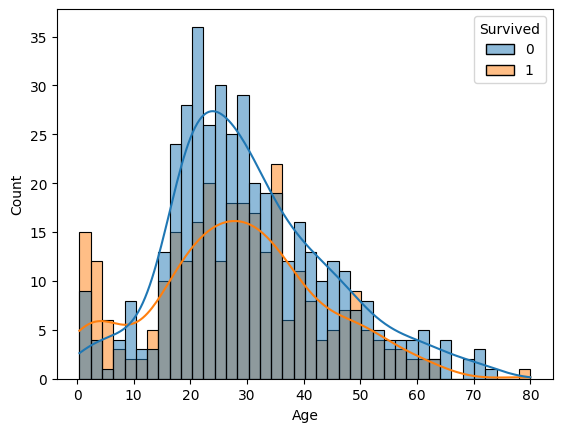

In [78]:
sns.histplot(train_df, x= 'Age', hue= 'Survived', bins = 40, kde= True );

### 3.2.2 Fare


In [79]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

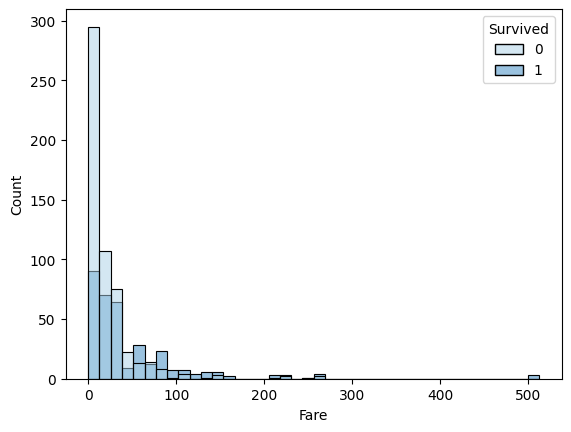

In [80]:
sns.histplot(train_df, x = 'Fare', hue= 'Survived', bins= 40, palette= "Blues");

#### Note: 
- Because when we are visualization('Fare'), have large space so we divided to each periods ---> Feature Engineering and Data Wrangling

# 4. Feature Engineering && Data Wrangling
- Divided 4 spaces - (0, 25), (25, 50), (50, 75), (75..)
## 4.1 Fare


In [81]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Fare survival')

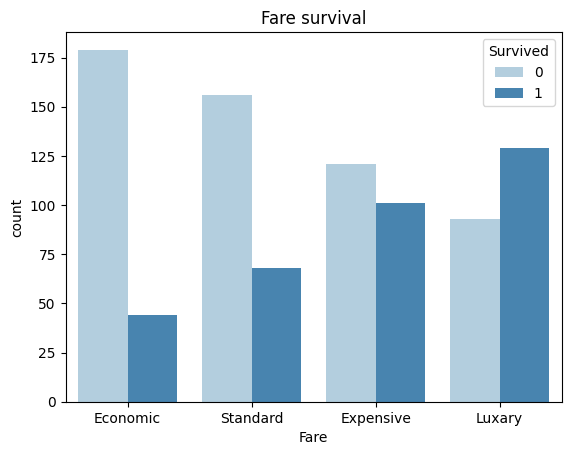

In [82]:
## 
fare_cate = ['Economic', 'Standard', 'Expensive', 'Luxary']
quartile_data = pd.qcut(train_df['Fare'], 4 , labels = fare_cate)

sns.countplot(x = quartile_data, hue= train_df['Survived'], palette= 'Blues');

plt.title("Fare survival")


## 4.2 Feature Engineering
### 4.1.1 Name 
- regular expression

In [83]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

### Regular expressions
- các chức vụ nói lên tầm quan trong -> tăng khả năng sống sót, hoặc ngược lại

In [84]:
## extract_title: mr, rev.....
## https://regex101.com/

import re

def extract_title(name):
    p = re.compile(r", ([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [85]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [86]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [87]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

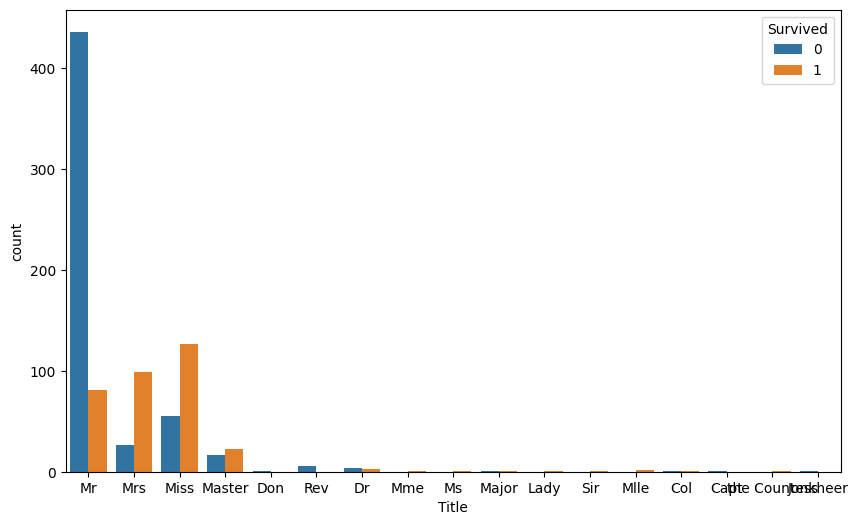

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(train_df, x='Title', hue= 'Survived')
plt.show()

### Note

- Because mr, mrss ,miss have quite large, but other is too small 
==> Decided to 4 Group: [Mr, Mrs, miss, Master (Other)]


In [89]:
### Function to group 

def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == 'Ms':
        return "Miss"
    else:
        return "Others"
    
## Run function

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))

test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [90]:
print(f"{train_df['Title'].value_counts()} \n")
print(f"{test_df['Title'].value_counts()} \n")

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64 

Title
Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: count, dtype: int64 



### Draw again with mr, mrs, miss, master, others.

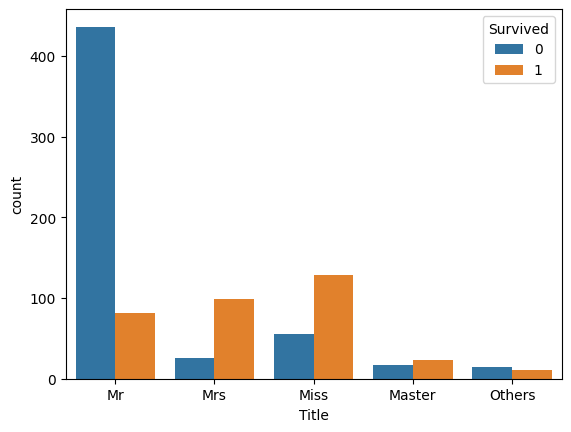

In [91]:
sns.countplot(data= train_df, x= 'Title', hue= 'Survived');

### 4.1.2 Family
- 'SibSp', 'Parch'

In [92]:
train_df["SibSp"].head(), train_df["Parch"].head()

(PassengerId
 1    1
 2    1
 3    0
 4    1
 5    0
 Name: SibSp, dtype: category
 Categories (7, int64): [0, 1, 2, 3, 4, 5, 8],
 PassengerId
 1    0
 2    0
 3    0
 4    0
 5    0
 Name: Parch, dtype: category
 Categories (7, int64): [0, 1, 2, 3, 4, 5, 6])

In [93]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

train_df['Family_size'], test_df['Family_size']

(PassengerId
 1      2
 2      2
 3      1
 4      2
 5      1
       ..
 887    1
 888    1
 889    4
 890    1
 891    1
 Name: Family_size, Length: 891, dtype: int32,
 PassengerId
 892     1
 893     2
 894     1
 895     1
 896     3
        ..
 1305    1
 1306    1
 1307    1
 1308    1
 1309    3
 Name: Family_size, Length: 418, dtype: int32)

#### Visualization

<Axes: xlabel='Family_size', ylabel='count'>

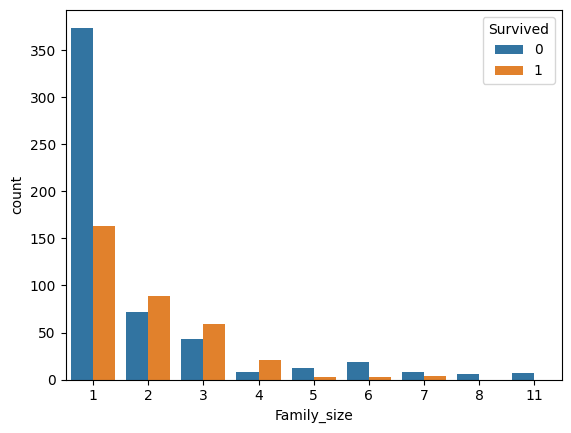

In [94]:
sns.countplot(train_df, x= 'Family_size', hue= 'Survived')

### Note
#### - Base on data, we can divide 4 groups: 
- [Alone, Small, Medium, Large]
- bin operate: (0, 1]...(1,4]...(4,6]...(6,20]

In [95]:
cate_Family = ['Alone', 'Small', 'Medium', 'Large']

train_df['Family_cate'] = pd.cut(train_df['Family_size'], bins= [0,1,4,6,20], labels= cate_Family)

test_df['Family_cate'] = pd.cut(test_df['Family_size'], bins= [0,1,4,6,20], labels= cate_Family)

In [96]:
train_df['Family_cate'].head(5), test_df['Family_cate'].head(5)

(PassengerId
 1    Small
 2    Small
 3    Alone
 4    Small
 5    Alone
 Name: Family_cate, dtype: category
 Categories (4, object): ['Alone' < 'Small' < 'Medium' < 'Large'],
 PassengerId
 892    Alone
 893    Small
 894    Alone
 895    Alone
 896    Small
 Name: Family_cate, dtype: category
 Categories (4, object): ['Alone' < 'Small' < 'Medium' < 'Large'])

### Visualization


<Axes: xlabel='Family_cate', ylabel='count'>

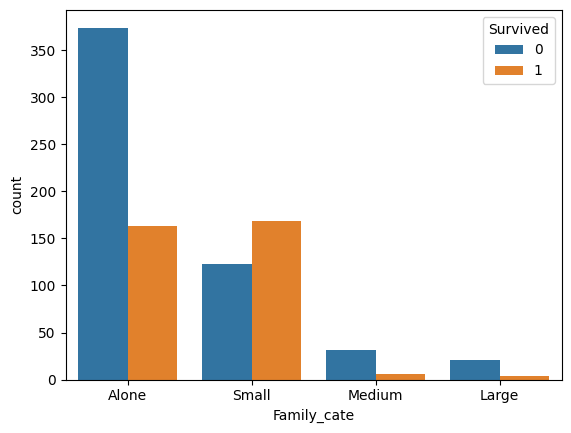

In [97]:
sns.countplot(train_df, x= 'Family_cate', hue= 'Survived')

## 4.3 Data Wrangling

In [98]:
num_features = ['Age', 'Fare']
cate_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_cate']

features_cols = num_features + cate_features
print(features_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cate']


In [101]:
## Display missing
def display_missing(df, features_cols):
    n_rows = df.shape[0]
    for col in features_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Col {col}: {missing_count} -- account for: {missing_count * 100/ n_rows: .2f}%")
            
## call function

display_missing(train_df, features_cols)
print("\n")
display_missing(test_df, features_cols)

Col Age: 177 -- account for:  19.87%
Col Embarked: 2 -- account for:  0.22%


Col Age: 86 -- account for:  20.57%
Col Fare: 1 -- account for:  0.24%


### 4.3.1 Filling missing values 
- by median - average that appear the most


In [103]:
# age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median();
# age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age']; ## pyton 3.10

age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age'] ## python 3.11.4

In [104]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [105]:
## filling
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

TypeError: incompatible index of inserted column with frame index

In [ ]:
## check already fill missing values
display_missing(train_df, features_cols)
display_missing(test_df, features_cols)

Col Embarked: 2 -- account for:  0.22%
Col Fare: 1 -- account for:  0.24%


# 4.3 Prepare to Train 
- num_features = ['Age', 'Fare']
- cate_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_cate']

- features_cols = num_features + cate_features

In [ ]:
features_cols

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cate']

In [ ]:
# divided X, y
X = train_df[features_cols]
y = train_df['Survived']

In [ ]:
X_test = test_df[features_cols]

### 4.3.1 Preprocessing pipeline

In [ ]:
#Libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
print(num_features)
print(cate_features)



['Age', 'Fare']
['Sex', 'Pclass', 'Embarked', 'Title', 'Family_cate']


In [ ]:
#Numerical
num_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy= 'median')), #fill value missing by median
    ('scaler', StandardScaler()) # scale value in data gan lai 
])

#Cate
cate_transformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy= 'most_frequent')), #fill value missing, appear the most in data.
    ('scaler', OneHotEncoder(handle_unknown= 'ignore')) # scale value in data gan lai 
])

#preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cate', cate_transformer, cate_features)
    
])

In [ ]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cate',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cate'])])

In [ ]:
X = preprocessor.transform(X)
X_test = preprocessor.transform(X_test)

# 5. Model training

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((712, 19), (179, 19), (418, 19))

## 5.1 Binary classification

- use: Logistic Regression, PolymiaFeatures, DecisionTree


In [ ]:
## Import lib

#binary classification
from sklearn.preprocessing import PolynomialFeatures

#Model: logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

#Model: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

### 5.1.1 Logistic Regression - usually use to classification.
- exercise: 2 labels: Survived, Not Survived; .......

In [ ]:
log_reg = LogisticRegression(solver= 'liblinear', max_iter= 1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
log_reg.score(X_val, y_val)

0.8603351955307262

In [ ]:
#predict
y_pred = log_reg.predict(X_val)
precision_score(y_val,y_pred), recall_score(y_val, y_pred)

(0.8181818181818182, 0.8513513513513513)

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       105
           1       0.82      0.85      0.83        74

    accuracy                           0.86       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.86      0.86      0.86       179



#### Polynomia Features
- y = a * x1 + b * x2 => y = a * x1^2 + b * x^2 + c * x1 *x2 + bias


In [ ]:
poly = PolynomialFeatures(degree= 5)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.fit_transform(X_val)

In [ ]:
poly_features_X_train.shape, poly_features_X_val.shape

((712, 42504), (179, 42504))

In [ ]:
## Logistics Regression with PolynomiaFeatures

poly_log_reg = LogisticRegression(solver= 'liblinear', max_iter= 1000)
poly_log_reg.fit(poly_features_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
poly_log_reg.score(poly_features_X_val, y_val)

0.8268156424581006

### 5.1.2 Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(
    criterion= 'entropy', max_depth= 5, random_state= 2022
)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [ ]:
decision_tree.score(X_val, y_val)

0.7932960893854749

## 5.1.3 Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
log_reg_cv = LogisticRegression(solver= 'liblinear', max_iter= 1000)
dt_cv = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, random_state= 2022)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring= 'accuracy', cv= 5)

In [ ]:
lr_scores, lr_scores.mean(), lr_scores.std()

(array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056]),
 0.826031008725127,
 0.020466357172416235)

# 5.2 Baseline Model Comparison

- LinearSVC, SVC
- KNN Classifier 
- RandomForestClassifier
- Gradient Boosting Classifier
- Extra Tree Classifier
- AdaBoostClassifier
- XGB Classifier

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

seed =  2023

models = {
    LinearSVC(max_iter= 12000, random_state= seed),
    SVC(random_state= seed),
    KNeighborsClassifier(metric= 'minkowski', p= 2),
    LogisticRegression(solver= 'liblinear', max_iter= 1000),
    DecisionTreeClassifier(random_state= seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(), 
    XGBClassifier(use_label_encoder= False, eval_metric= 'logloss', random_state=seed)
}

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


## Stratified Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_result(models, X, y, metrics, cv= 5, plot_results= False):
    #define K-fold:
    kfold = StratifiedKFold(cv, shuffle= True, random_state= seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        # print(model_name)
        scores = cross_val_score(model, X, y, scoring= metrics, cv= kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
            
    cv_df = pd.DataFrame(entries, columns= ['model_name', 'fold_id', 'accuracy_score'])
    
    if plot_results:
        sns.boxplot(x ='model_name', y= 'accuracy_score', data= cv_df, color= 'lightblue', showmeans= True)
        plt.title('Boxplot of Base_line Model Accuracy using 5-fold cross-validation')
        plt.xticks(rotation= 45)
        plt.show()
    
    
    ###Summary result:
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_result = pd.concat([mean, std], axis= 1, ignore_index= True)
    baseline_result.columns = ['Mean', 'Standard Deviation']
    
    #sort by accuracy
    baseline_result.sort_values(by= ['Mean'], ascending= False, inplace= True)
    
    
    return baseline_result
#call
generate_baseline_result(models, X, y, metrics= 'accuracy', cv= 5, plot_results= False)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\s

,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
XGBClassifier,0.824889,0.015407
AdaBoostClassifier,0.818160,0.030812
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.802442,0.017379
DecisionTreeClassifier,0.793491,0.025860
